<a href="https://colab.research.google.com/github/jpbarragan99/site_mapper/blob/main/archeo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
!pip install geopandas
import pandas as pd
import geopandas as gpd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
df = gpd.read_file('CSV - Hoja 1.csv')
df.head()

ERROR:fiona._env:Pointer 'hGeom' is NULL in 'OGR_G_GetGeometryType'.

ERROR:fiona._env:Pointer 'hGeom' is NULL in 'OGR_G_GetGeometryType'.

ERROR:fiona._env:Pointer 'hGeom' is NULL in 'OGR_G_GetGeometryType'.

ERROR:fiona._env:Pointer 'hGeom' is NULL in 'OGR_G_GetGeometryType'.

ERROR:fiona._env:Pointer 'hGeom' is NULL in 'OGR_G_GetGeometryType'.

ERROR:fiona._env:Pointer 'hGeom' is NULL in 'OGR_G_GetGeometryType'.



,site_name,latitude,longitude,elevation,artifact_distribution,geometry
0,temple_A,123,134,432,high,None
1,market,123,164,422,high,None
2,house_rich,133,174,422,low,None
3,house_commune,153,195,410,moderate,None
4,temple_B,163,200,425,moderate,None


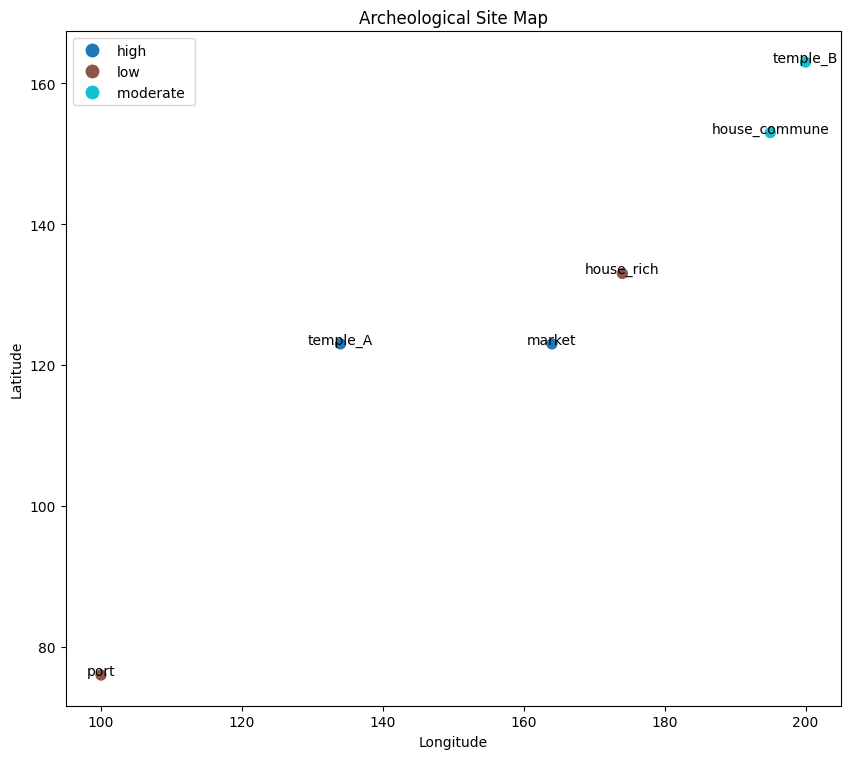

In [41]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Convert the latitude and longitude to a Point object
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]

# Create a geopandas dataframe from the pandas dataframe and Point objects
geo_df = gpd.GeoDataFrame(df, geometry=geometry)

# Set the coordinate reference system (CRS) of the geopandas dataframe
geo_df.crs = {'init': 'epsg:4326'}

# Create a map of the site, with color indicating artifact distribution
fig, ax = plt.subplots(figsize=(10, 10))
geo_df.plot(ax=ax, column='artifact_distribution', legend=True, markersize=50, aspect='equal')

# Add labels to each point
for i, row in geo_df.iterrows():
    ax.annotate(row['site_name'], xy=(row['geometry'].x, row['geometry'].y + 0.0005),
                ha='center', fontsize=10)

# Add a title and axis labels to the plot
ax.set_title('Archeological Site Map')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()